In [2]:
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import numpy as np

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Final_merged_dataset.csv')

In [5]:
df

,Unnamed: 0,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,N,P,K,temperature,humidity,pH,rainfall
0,2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,rice,102.00,321.00,90,42,43,20.879744,82.002744,6.502985,202.935536
1,12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,rice,83.00,300.00,85,58,41,21.770462,80.319644,7.038096,226.655537
2,18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,rice,189.20,510.84,60,55,44,23.004459,82.320763,7.840207,263.964248
3,27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,rice,52.00,90.17,74,35,40,26.491096,80.158363,6.980401,242.864034
4,36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,rice,52.94,72.57,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35199,98655,Kerala,IDUKKI,2002,Whole Year,coffee,11490.00,8475.00,88,50,40,25.632150,79.951509,7.051822,182.258228
35200,100784,Kerala,PALAKKAD,2001,Whole Year,coffee,4650.00,3450.00,67,41,40,25.848795,87.816617,7.333143,152.619440
35201,100810,Kerala,PALAKKAD,2002,Whole Year,coffee,4650.00,2150.00,72,42,43,26.567673,80.904245,6.352771,181.291561
35202,101998,Kerala,WAYANAD,2001,Whole Year,coffee,67510.00,54110.00,89,40,43,26.245321,72.971984,7.124050,189.971118


In [6]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35204 entries, 0 to 35203
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     35204 non-null  object 
 1   District_Name  35204 non-null  object 
 2   Crop_Year      35204 non-null  int64  
 3   Season         35204 non-null  object 
 4   Crop           35204 non-null  object 
 5   Area           35204 non-null  float64
 6   Production     34882 non-null  float64
 7   N              35204 non-null  int64  
 8   P              35204 non-null  int64  
 9   K              35204 non-null  int64  
 10  temperature    35204 non-null  float64
 11  humidity       35204 non-null  float64
 12  pH             35204 non-null  float64
 13  rainfall       35204 non-null  float64
dtypes: float64(6), int64(4), object(4)
memory usage: 3.8+ MB


In [8]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production', 'N', 'P', 'K ', 'temperature ', 'humidity', 'pH',
       'rainfall'],
      dtype='object')

In [9]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,N,P,K,temperature,humidity,pH,rainfall
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,rice,102.00,321.00,90,42,43,20.879744,82.002744,6.502985,202.935536
1,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,rice,83.00,300.00,85,58,41,21.770462,80.319644,7.038096,226.655537
2,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,rice,189.20,510.84,60,55,44,23.004459,82.320763,7.840207,263.964248
3,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,rice,52.00,90.17,74,35,40,26.491096,80.158363,6.980401,242.864034
4,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,rice,52.94,72.57,78,42,42,20.130175,81.604873,7.628473,262.717340


In [10]:
df.tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,N,P,K,temperature,humidity,pH,rainfall
35199,Kerala,IDUKKI,2002,Whole Year,coffee,11490.0,8475.0,88,50,40,25.632150,79.951509,7.051822,182.258228
35200,Kerala,PALAKKAD,2001,Whole Year,coffee,4650.0,3450.0,67,41,40,25.848795,87.816617,7.333143,152.619440
35201,Kerala,PALAKKAD,2002,Whole Year,coffee,4650.0,2150.0,72,42,43,26.567673,80.904245,6.352771,181.291561
35202,Kerala,WAYANAD,2001,Whole Year,coffee,67510.0,54110.0,89,40,43,26.245321,72.971984,7.124050,189.971118
35203,Kerala,WAYANAD,2002,Whole Year,coffee,66973.0,52697.0,89,57,43,26.915150,73.198975,6.998787,177.223305


In [11]:
df.describe()

,Crop_Year,Area,Production,N,P,K,temperature,humidity,pH,rainfall
count,35204.000000,35204.000000,3.488200e+04,35204.000000,35204.000000,35204.00000,35204.000000,35204.000000,35204.000000,35204.000000
mean,2005.775821,25334.865303,6.385732e+04,78.783860,50.998949,33.10067,23.818700,74.926301,6.327570,156.252624
std,5.053897,51666.845376,1.482897e+05,16.880729,13.962629,15.26591,3.237360,9.750261,0.616945,76.302004
min,1997.000000,1.000000,0.000000e+00,0.000000,5.000000,5.00000,8.825675,45.022364,4.507524,35.154262
25%,2002.000000,329.000000,8.500000e+02,68.000000,42.000000,21.00000,21.701814,66.504155,5.855119,88.453619
50%,2006.000000,3240.000000,8.813000e+03,79.000000,50.000000,37.00000,23.857240,80.261731,6.282362,113.116109
75%,2010.000000,22507.750000,5.305825e+04,91.000000,57.000000,42.00000,25.718958,82.678395,6.740001,227.363701
max,2015.000000,687000.000000,2.589591e+06,120.000000,145.000000,205.00000,43.675493,94.964199,7.995849,298.560117


In [12]:
df.isnull()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,N,P,K,temperature,humidity,pH,rainfall
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35199,False,False,False,False,False,False,False,False,False,False,False,False,False,False
35200,False,False,False,False,False,False,False,False,False,False,False,False,False,False
35201,False,False,False,False,False,False,False,False,False,False,False,False,False,False
35202,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum()

State_Name         0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Area               0
Production       322
N                  0
P                  0
K                  0
temperature        0
humidity           0
pH                 0
rainfall           0
dtype: int64

In [14]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
35199    False
35200    False
35201    False
35202    False
35203    False
Length: 35204, dtype: bool

In [15]:
df.Production.unique()

array([  321.  ,   300.  ,   510.84, ...,  3450.  , 54110.  , 52697.  ])

In [16]:
Prod = df.Production.mean()
print(Prod)
df.Production.fillna(value = Prod,inplace = True)

63857.324995126415


In [17]:
df.Production.isnull().sum()

0

In [18]:
Production=(df['Production'].astype(int))
Production

0          321
1          300
2          510
3           90
4           72
         ...  
35199     8475
35200     3450
35201     2150
35202    54110
35203    52697
Name: Production, Length: 35204, dtype: int64

Random Forest

In [19]:
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
N                  int64
P                  int64
K                  int64
temperature      float64
humidity         float64
pH               float64
rainfall         float64
dtype: object

In [20]:
df['Crop'].unique()

array(['rice', 'maize', 'blackgram', 'lentil', 'banana', 'mango',
       'grapes', 'apple', 'orange', 'papaya', 'jute', 'coffee'],
      dtype=object)

In [21]:
df['Crop'].value_counts()

rice         15104
maize        13947
banana        3209
jute          1453
papaya         483
mango          449
orange         271
grapes         129
blackgram      118
lentil          31
coffee           6
apple            4
Name: Crop, dtype: int64

<AxesSubplot:>

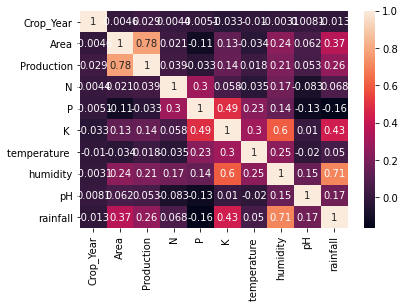

In [22]:
sns.heatmap(df.corr(),annot=True)

In [23]:
features = df[['N', 'P','K ','temperature ', 'humidity', 'pH', 'rainfall']]
target = df['Crop']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['Crop']

In [24]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [25]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [27]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)`

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  99.85797471950008
              precision    recall  f1-score   support

       apple       0.00      0.00      0.00         0
      banana       1.00      1.00      1.00       624
   blackgram       1.00      0.96      0.98        28
      grapes       1.00      0.89      0.94        18
        jute       1.00      0.98      0.99       281
      lentil       0.60      1.00      0.75         3
       maize       1.00      1.00      1.00      2853
       mango       0.99      1.00      0.99        94
      orange       1.00      1.00      1.00        49
      papaya       0.95      1.00      0.98       102
        rice       1.00      1.00      1.00      2989

    accuracy                           1.00      7041
   macro avg       0.87      0.89      0.88      7041
weighted avg       1.00      1.00      1.00      7041



TEst the model

In [28]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['jute']


In [29]:
data = np.array([[83, 4, 6, 28, 70.3, 3, 150.9]])
prediction = RF.predict(data)
print(prediction)

['maize']


In [43]:
##Pickle 

In [46]:
import pickle
# open a file, where you ant to store the data
file = open('RF_model_crop_prediction.pkl', 'wb')
# dump information to that file
pickle.dump(RF, file)

In [39]:
df_fer = pd.read_csv('Fertilizer Prediction.csv')

In [40]:
df_fer

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [42]:
df_fer['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)